# Exponentially Weighted Average

- Exponentially Weighted Average is one of the most important algorithms currently in usage.

- This algorithm has been mostly used to reduce the noisy time-series data. It’s also called “smoothing” the data.

- The way we achieve this is by essentially weighing the number of observations and using their average. This is called as Moving Average.

<img src="figures/temp_data.png" alt="temp_data" style="width: 500px;"/>

Let’s say we want to calculate moving average of temperature data in the last N days. Data series about the temperature each day are given in $\theta_1, \theta_2, \dots, \theta_N$. With exponentially weighted average, what we do is we start with 0, and then every day, we’re going to combine it with a weight of a parameter (let’s say $\beta$) times whatever is the value accumulated until now plus $1-\beta$ times that day’s temperature.


$$ V_0 = 0 $$
$$ V_1 = \beta V_0 + (1- \beta) \theta_1 $$
$$ V_2 = \beta V_1 + (1- \beta) \theta_2 $$
$$ \vdots $$
$$ V_N = \beta V_{N-1} + (1- \beta) \theta_N $$

In other words, we can write the equation for exponentially weighted average for a given time $t$ as:

$$ V_t = \beta V_{t-1} + (1- \beta) \theta_t $$

<img src="figures/temp_data_ma.png" alt="temp_data_ma" style="width: 500px;"/>


- `By choosing the $\beta$ value, we control how much weight to give for the last $N$ days in calculating the average.`

 - `$1/(1-\beta)$ gives us an estimate of the number of days we're averaging over. `
 
 - `With $\beta$ as 0.9, we will average over last 10 days of temperature while with $\beta$ as 0.98, we take into account last 50 days of temperature and hence average over the 50 days of temperature.`

By averaging over a larger window, **the average adapts slowly**, when the temperature changes. This is because a lot of weight is given to previous value and a much smaller weight is given to the new value.


\begin{align*} & V_t = (1- \beta) \theta_t +  (1-\beta)\beta \theta_{t-1} +  (1-\beta)\beta^2 \theta_{t-2} +  (1-\beta)\beta^3 \theta_{t-3} +  (1-\beta) \beta^4 \theta_{t-4} + ... \newline
& V_t = (1- \beta) [ \theta_t + \beta \theta_{t-1} +  \beta^2 \theta_{t-2} + \beta^3 \theta_{t-3} +  \beta^4 \theta_{t-4} + ... ]
\end{align*}

<img style="float: right; margin: 0px 0px 15px 15px;" src="figures/ewa_2.png" width="250" />

A bit of intuition of how this formula is exponential decay. As we see below the value of 1-β is what we multiply with the current value. If we expand the equation, we see that we end up multiplying the current value by 1-β and the previous values of β are exponentially decaying on the curve.


Exponential moving average is a highly efficient way to calculate an average. We don’t need much memory or compute power to calculate this average. It’s also highly suited for Machine learning optimizations and using some form of the exponentially weighted average might be helpful over simple gradient descent in neural nets.


## Function to create Exponentially Weighted Moving Average

In [1]:
# Function to creare Exponentially Weighted Moving Average (EWMA)
def exponentially_weighted_moving_average(beta, numOfData):
    
    # a list to store the moving averages
    v = np.zeros(numOfData+1)
    
    v[0] = 0 # initial moving average should be zero
    
    i = 1
    while(i < numOfData):
        v[i] = beta *v[i-1] + (1 - beta) * y[i-1]
        i += 1
        
    return v

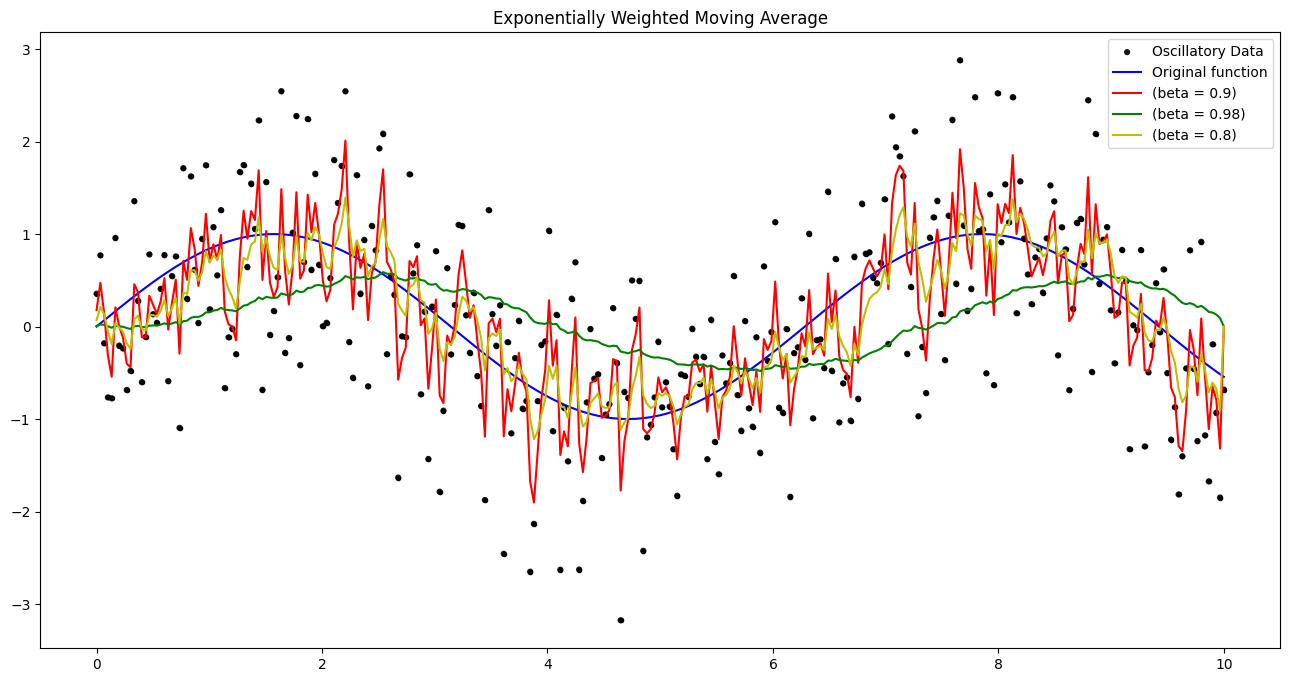

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Total number of data points
n = 300

#Create "n" data points along x axis
X = np.linspace(0,10,n) 

y = np.zeros(n)
for i in range(n):
    # creating a function with noise
    y[i] = np.sin(X[i]) + np.random.normal(0, 0.9, 1)
    
# creating data points using a sine function no noise
z = np.sin(X) 


# Create EWMA using a betas
v1 = exponentially_weighted_moving_average(0.5, n)
v2 = exponentially_weighted_moving_average(0.98, n)
v3 = exponentially_weighted_moving_average(0.8, n)

# Plot the oscillatory data and the EWMA lines
plt.figure(figsize = (16,8))
plt.scatter(X,y,alpha=0.9, c="black", edgecolors='none', s=20, label="Oscillatory Data")
plt.plot(X,z,"b-", label="Original function")
plt.plot(X,y,"k.")
plt.plot(X,v1[1:],"r-", label="(beta = 0.9)")
plt.plot(X,v2[1:],"g-", label="(beta = 0.98)")
plt.plot(X,v3[1:],"y-", label="(beta = 0.8)")

plt.title("Exponentially Weighted Moving Average")
plt.legend(loc="best")
plt.show()

- $\beta = 0.5$: It gives $(0.5)^k \approx 0.35$ => $k \approx 2$ 
- $\beta = 0.9$: It gives $(0.9)^k \approx 0.35$ => $k \approx 10$ 
- $\beta = 0.98$: It gives $(0.98)^k \approx 0.35$ => $k \approx 50$ 

## Exponentially weighted averages with bias correction

The above implementation starts with $V_0 = 0$. This makes the algorithm biased at the beginning of it's implementation. It will then take some time to correct this bias.

<img src="figures/ewa_bias_correction.png" alt="ewa_bias_correction" style="width: 500px;"/>

In order to solve this problem, we will add a bias correction term as follows:

$$ V_t = \frac{\beta V_{t-1} + (1- \beta) \theta_t}{1 - \beta^t} $$


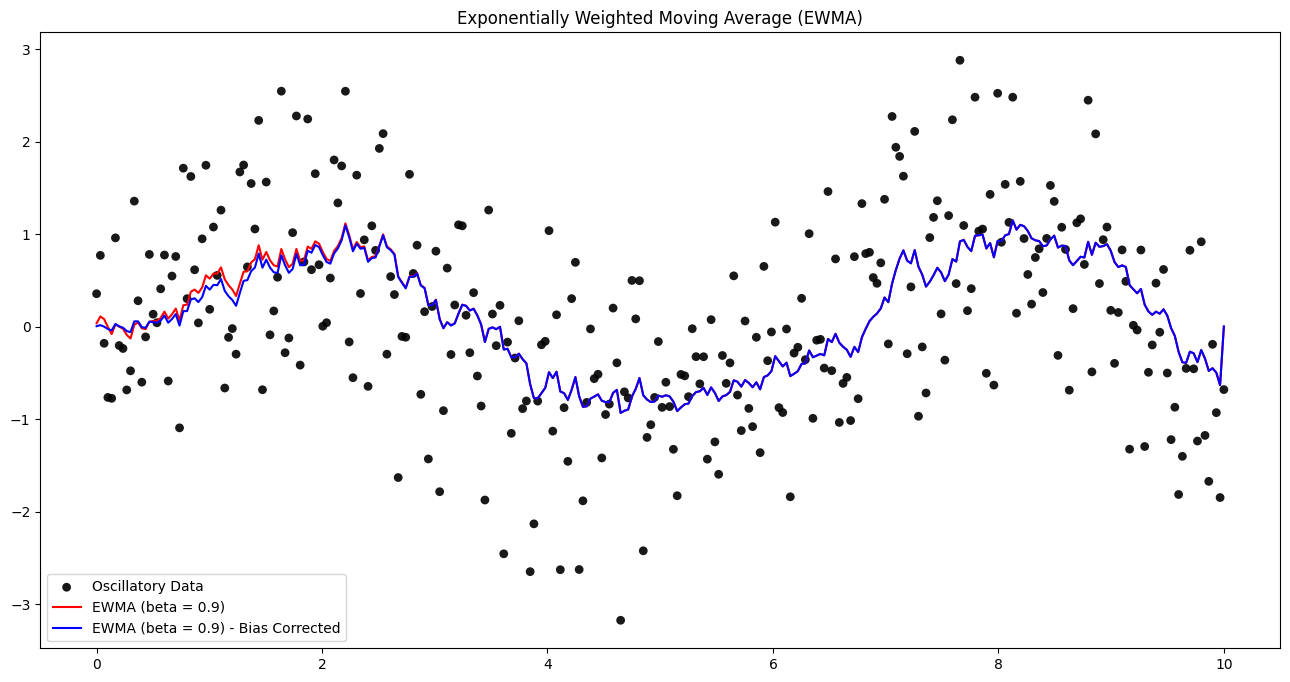

In [3]:
# Function to creare bias-corrected Exponentially Weighted Moving Average (EWMA)
def exponentially_weighted_moving_average_bias_corrected(beta, numOfData):
    # a list to store the bias-corrected moving averages
    v = np.zeros(numOfData+1)
    
    v[0] = 0 # initial moving average should be zero
    
    i = 1
    while(i < numOfData):
        v[i] = (1.0 - beta**i) * (beta*v[i-1] + (1 - beta) * y[i-1])
        i += 1
 
    return v
    

# Create both the vanilla and bias-corrected EWMA 
v1 = exponentially_weighted_moving_average(0.9, n)
v2 = exponentially_weighted_moving_average_bias_corrected(0.9, n)

# Plot the noisy data and the EWMA lines
plt.figure(figsize = (16,8))
plt.scatter(X,y,alpha=0.9, c="black", edgecolors='none', s=40, label="Oscillatory Data")
plt.plot(X,v1[1:],"r-", label="EWMA (beta = 0.9)")
plt.plot(X,v2[1:],"b-", label="EWMA (beta = 0.9) - Bias Corrected")
plt.title("Exponentially Weighted Moving Average (EWMA)")
plt.legend(loc="best")
plt.show()

# Gradient Descent with Momentum

* The momentum algorithm almost always works faster than standard gradient descent.
* The simple idea is to calculate the exponentially weighted averages for your gradients and then update your weights with the new values.
* Gradient Descent with Momentum allows for a smoother and faster convergence.

* Pseudo code:

```python
vdW = 0, vdb = 0
on iteration t:
	# can be mini-batch or batch gradient descent
	compute dw, db on current mini-batch                
			
	vdW = beta * vdW + (1 - beta) * dW
	vdb = beta * vdb + (1 - beta) * db
	W = W - learning_rate * vdW
	b = b - learning_rate * vdb
```

* Momentum helps the cost function to go to the minimum point in a more fast and consistent way.
* beta is another hyperparameter. beta = 0.9 is very common and works very well in most cases.
* In practice people don't bother implementing bias correction.

<img src="figures/gradient_descent_momentum.png" alt="gradient_descent_momentum" style="width: 700px;"/>

# RMSprop

* RMSprop stands for Root mean square prop.
* This algorithm speeds up the gradient descent.
* Pseudo code:

```python
sdW = 0, sdb = 0
on iteration t:
	# can be mini-batch or batch gradient descent
	compute dw, db on current mini-batch
	
	sdW = (beta * sdW) + (1 - beta) * dW^2  # squaring is element-wise
	sdb = (beta * sdb) + (1 - beta) * db^2  # squaring is element-wise
	W = W - learning_rate * dW / sqrt(sdW)
	b = B - learning_rate * db / sqrt(sdb)
```

* RMSprop will decrease the gradient change when is gradient is large, and increase the gradient change when the gradient is slow.
* Ensure that sdW is not zero by adding a small value epsilon (e.g. epsilon = 10^-8) to it:
    * ```python 
    W = W - learning_rate * dW / (sqrt(sdW) + epsilon)
    ```
* With RMSprop you can increase your learning rate.


# Adam optimization algorithm

* Adam stands for Adaptive Moment Estimation.
* Adam optimization and RMSprop are among the optimization algorithms that worked very well with a lot of NN architectures.
* Adam optimization simply puts RMSprop and momentum together!
* Pseudo code:

```python
vdW = 0, vdW = 0
sdW = 0, sdb = 0
on iteration t:
	# can be mini-batch or batch gradient descent
	compute dw, db on current mini-batch                
			
	vdW = (beta1 * vdW) + (1 - beta1) * dW     # momentum
	vdb = (beta1 * vdb) + (1 - beta1) * db     # momentum
			
	sdW = (beta2 * sdW) + (1 - beta2) * dW^2   # RMSprop
	sdb = (beta2 * sdb) + (1 - beta2) * db^2   # RMSprop
			
	vdW = vdW / (1 - beta1^t)      # fixing bias
	vdb = vdb / (1 - beta1^t)      # fixing bias
			
	sdW = sdW / (1 - beta2^t)      # fixing bias
	sdb = sdb / (1 - beta2^t)      # fixing bias
					
	W = W - learning_rate * vdW / (sqrt(sdW) + epsilon)
	b = B - learning_rate * vdb / (sqrt(sdb) + epsilon)
```

* Hyperparameters for Adam:
    * Learning rate: needed to be tuned.
    * beta1: parameter of the momentum - 0.9 is recommended by default.
    * beta2: parameter of the RMSprop - 0.999 is recommended by default.
    * epsilon: 10^-8 is recommended by default.

# Learning rate decay

* Learning rate decay is the technique of slowly reducing the learning rate after each iteration.
* As mentioned before, it's possible sometimes that we won't reach the optimum point (converge). But by making the learning rate decay with iterations it will be much closer to it because the steps (and possible oscillations) near the optimum are smaller.
* One technique equations is `learning_rate = (1 / (1 + decay_rate * epoch_num)) * learning_rate_0`
    * `epoch_num` is over all data (not a single mini-batch).
* Other learning rate decay methods (continuous):
    * `learning_rate = (0.95 ^ epoch_num) * learning_rate_0`
    * `learning_rate = (k / sqrt(epoch_num)) * learning_rate_0`
* Some people perform learning rate decay discretely - repeatedly decrease after some number of epochs.
* Some people are making changes to the learning rate manually.
* `decay_rate` is another `hyperparameter`.

### Exponential Scheduling
```lr = lr0 * 0.1**(epoch / s)```

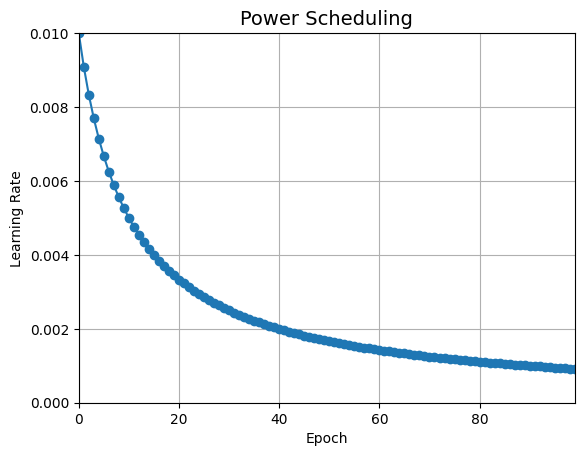

In [4]:
import math
import numpy as np
import matplotlib.pyplot as plt

learning_rate = 0.01
decay = 1e-4
batch_size = 32
n_epochs = 100

n_steps_per_epoch = math.ceil((32000) / batch_size)
epochs = np.arange(n_epochs)
lrs = learning_rate / (1 + decay * epochs * n_steps_per_epoch)

plt.plot(epochs, lrs,  "o-")
plt.axis([0, n_epochs - 1, 0, 0.01])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Power Scheduling", fontsize=14)
plt.grid(True)
plt.show()

### `Customize a Learning Rate Scheduler`

In [5]:
def exponential_decay_fn(epoch):
    return 0.01 * 0.1**(epoch / 20)

In [6]:
# how to implement a function which takes inputs other than the required inputs
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1**(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(lr0=0.01, s=20)

In [72]:
# loading digits dataset
from sklearn import datasets
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder

X_train_full = (datasets.load_digits()).data
one = OneHotEncoder(sparse=False)
y_train_full = (datasets.load_digits()).target

y_train_full = one.fit_transform(y_train_full.reshape(-1, 1))

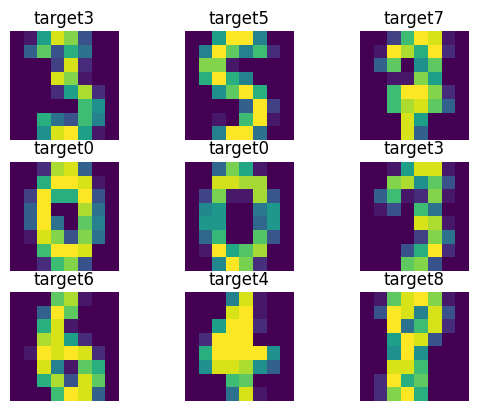

In [73]:
plt.Figure(figsize=(20,20))
for i in range(9):
    plt.subplot(3,3, i+1)
    index = np.random.randint(len(X_train_full))
    plt.imshow(X_train_full[index].reshape(8,8))
    plt.title(f'target{np.argmax(y_train_full[index])}')
    plt.axis('off')

In [74]:
max_pixel = X_train_full[1].max()

X_train_full = X_train_full

X_valid, X_train = X_train_full[1000:], X_train_full[:1000]
y_valid, y_train = y_train_full[1000:], y_train_full[:1000]

In [115]:
from tensorflow import keras
from tensorflow.keras.regularizers import l1, l2

model = keras.models.Sequential()
model.add(keras.layers.Dense(20, activation="relu"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
n_epochs = 25

In [116]:
lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)
history = model.fit(X_train, y_train, epochs=n_epochs,batch_size=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25


100/100 [==============================] - 1s 4ms/step - loss: 0.9607 - accuracy: 0.7340 - val_loss: 0.4590 - val_accuracy: 0.8758 - lr: 0.0100
Epoch 2/25
100/100 [==============================] - 0s 2ms/step - loss: 0.3050 - accuracy: 0.9100 - val_loss: 0.3701 - val_accuracy: 0.8883 - lr: 0.0089
Epoch 3/25
100/100 [==============================] - 0s 2ms/step - loss: 0.2305 - accuracy: 0.9230 - val_loss: 0.3242 - val_accuracy: 0.9084 - lr: 0.0079
Epoch 4/25
100/100 [==============================] - 0s 2ms/step - loss: 0.1771 - accuracy: 0.9370 - val_loss: 0.3472 - val_accuracy: 0.9122 - lr: 0.0071
Epoch 5/25
100/100 [==============================] - 0s 3ms/step - loss: 0.1714 - accuracy: 0.9470 - val_loss: 0.2888 - val_accuracy: 0.9285 - lr: 0.0063
Epoch 6/25
100/100 [==============================] - 0s 3ms/step - loss: 0.1693 - accuracy: 0.9400 - val_loss: 0.4405 - val_accuracy: 0.8595 - lr: 0.0056
Epoch 7/25
100/100 [==============================] - 0s 2ms/step - loss: 0.1760 

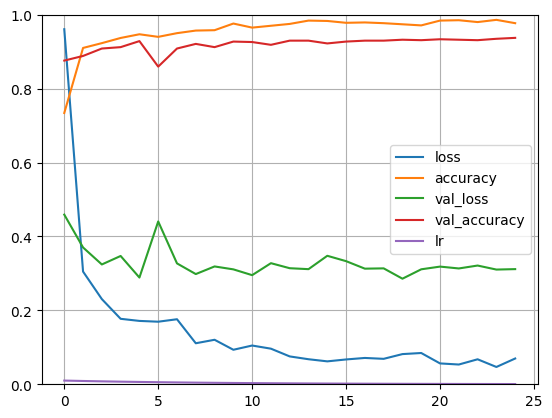

In [117]:
plt.plot(pd.DataFrame(history.history), label= history.history.keys())
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.legend()
tf.keras.backend.clear_session()
plt.show()

### Testing Different Optmizers

In [118]:
optimizer = [0 ] * 4
optimizer[0] = keras.optimizers.SGD(learning_rate=0.05, momentum=0.9)
optimizer[1] = keras.optimizers.Adagrad(learning_rate=0.05)
optimizer[2] = keras.optimizers.RMSprop(learning_rate=0.05, rho=0.9)
optimizer[3] = keras.optimizers.Adam(learning_rate=0.05, beta_1=0.9, beta_2=0.999)

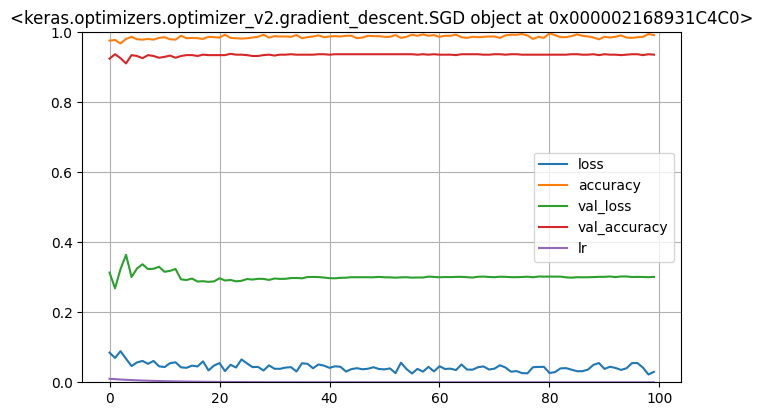

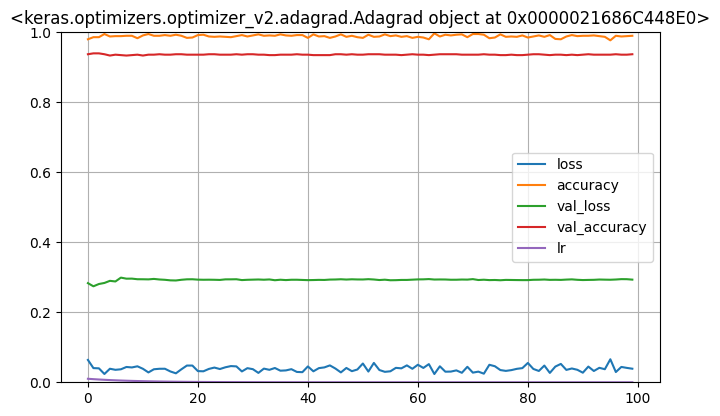

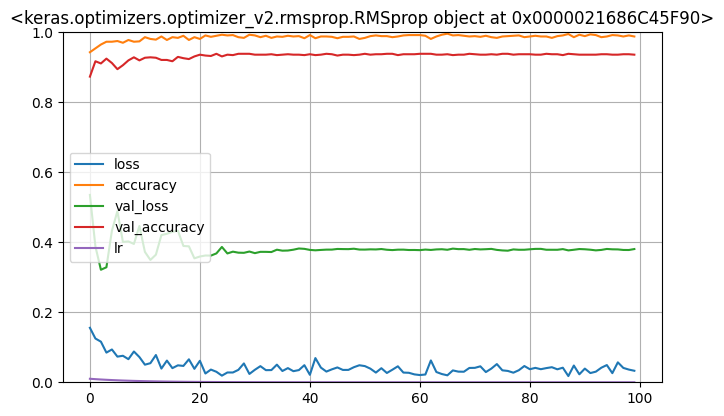

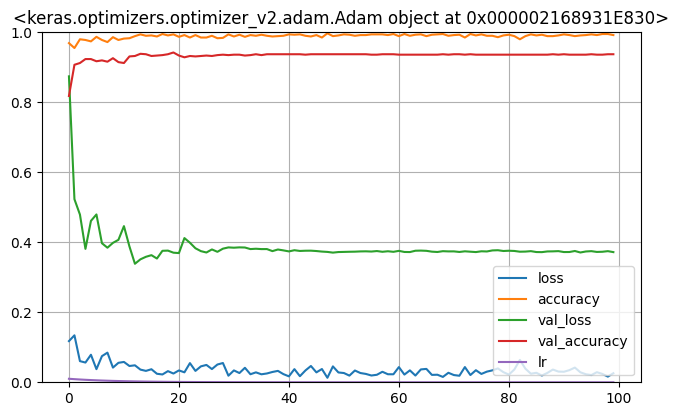

In [119]:
#lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.05, patience=5)
for i in range(4):
    plt.figure(figsize=(17,10))

    model.compile(loss="categorical_crossentropy", optimizer= optimizer[i], metrics=["accuracy"])
    n_epochs = 100

    history = model.fit(X_train, y_train, epochs=n_epochs,batch_size=10,
                    validation_data=(X_valid, y_valid),
                    verbose = 0, callbacks=[lr_scheduler] )


    plt.subplot(2,2,  1)
    plt.plot(pd.DataFrame(history.history), label= history.history.keys())
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.legend()
    tf.keras.backend.clear_session()
    plt.title(f'{optimizer[i]}')
    plt.show()